In [84]:
import numpy as np
from PIL import Image
import math

In [131]:
def smoother(pname, k):
    f = np.ones((k,k))
    f = f/k**2
    im = Image.open(pname).convert('L')
    img_np = np.array(im)
    width,height = im.size

    for x in range(0,width-k+1):
        for y in range(0,height-k+1):
            img_matrix = img_np[x:x+k, y:y+k]
            img_m = img_matrix*f
            im.putpixel((y,x),int(np.sum(img_m)))
    im.show()
    return 

In [82]:
smoother("smoothing.tif",3)
smoother("smoothing.tif",5)
smoother("smoothing.tif",15)
smoother("smoothing.tif",35)

It was observed that by increasing size of filter, the image as more smoothed or blurred.

In [195]:
def Second_smoother(pname):
    f = np.array([[1,2,1],[2,4,2],[1,2,1]])
    f = f/16
    k=3
    im = Image.open(pname).convert('L')
    img_np = np.array(im)
    width,height = im.size

    for x in range(0,height-k):
        for y in range(0,width-k):
            img_matrix = img_np[x:x+k, y:y+k]
            img_m = img_matrix*f
            im.putpixel((y,x),int(np.sum(img_m)))
    im.show()
    return im

In [130]:
Second_smoother("smoothing.tif")

# Task 2

In [192]:
def Gaussian_Filter(pname):
    k=7
    f = np.array([[1,1,2,2,2,1,1],[1,2,2,4,2,2,1],[2,2,4,8,4,2,2],[2,4,8,16,8,4,2],[2,2,4,8,4,2,2],[1,2,2,4,2,2,1],[1,1,2,2,2,1,1]])
    f = f/140
    im = Image.open(pname).convert('L')
    img_np = np.array(im)
    width,height = im.size
    s = 1.4
    for x in range(0,height-k+1):
        for y in range(0,width-k):
            img_matrix = img_np[x:x+k, y:y+k]
            img_m = img_matrix*f
            im.putpixel((x,y),int(np.sum(img_m)))
    im.show()
    return im

In [169]:
im = Gaussian_Filter("smoothing.tif")

# Task 3

In [197]:
pname = "unsharpmasking.tif"
im1 = Image.open(pname).convert('L')
im2 = Second_smoother(pname)
im1_np = np.array(im1)


In [205]:
im3_np = np.array(im2)-im1_np
im3 = Image.fromarray(im3_np)
im3.show()
im4_np = im3_np + im1_np
im4 = Image.fromarray(im4_np)

im4.show()
im1.show()

0


In [214]:
def Median_Filter(pname):
    k=3
    im = Image.open(pname).convert('L')
    im.show()
    img_np = np.array(im)
    width,height = im.size

    for x in range(0,height-k):
        for y in range(0,width-k):
            img_matrix = img_np[x:x+k, y:y+k]
            im.putpixel((y,x),int(np.median(img_matrix)))
    im.show()
    return im

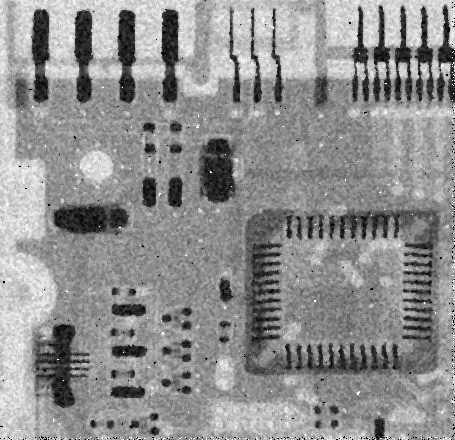

In [215]:
pname = "saltandpaper.tif"
Median_Filter(pname)

In [216]:
def Sharpen_h(pname):
    f = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    k=3
    im = Image.open(pname).convert('L')
    img_np = np.array(im)
    width,height = im.size

    for x in range(0,height-k):
        for y in range(0,width-k):
            img_matrix = img_np[x:x+k, y:y+k]
            img_m = img_matrix*f
            im.putpixel((y,x),int(np.sum(img_m)))
    im.show()
    return im

In [220]:
def Sharpen_v(pname):
    f = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
    k=3
    im = Image.open(pname).convert('L')
    img_np = np.array(im)
    width,height = im.size

    for x in range(0,height-k):
        for y in range(0,width-k):
            img_matrix = img_np[x:x+k, y:y+k]
            img_m = img_matrix*f
            im.putpixel((y,x),int(np.sum(img_m)))
    im.show()
    return im

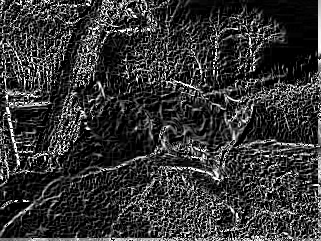

In [223]:
pname = "two_cats.jpg"
im_h = Sharpen_h(pname)
im_v = Sharpen_v(pname)
im_new = np.array(im_h)+np.array(im_v)
im_new = Image.fromarray(im_new)
im_new